In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from scipy.stats import t
from matplotlib.colors import ListedColormap
from scipy import stats
import matplotlib

# Exercise: Linear Regression 

We start by building a dataset (X,Y) with 50 samples, using the linear function f and add noise using np.random.normal(0,sigma):

In [87]:
def f(x,theta):
    x_temp = np.array([1.0,x])
    return np.dot(x_temp,theta)

In [88]:
sigma = 25
n =7
x = np.linspace(0,100,n)

#our linear model is defined by beta:
beta = [3.0,1.5]

#a more compact way of coding this: 
y = np.array([ f(x[kk],beta) + np.random.normal(0,sigma) for kk in range(len(x))])
#test with random data:
# y = np.array([ np.random.random() for kk in range(len(x))])  

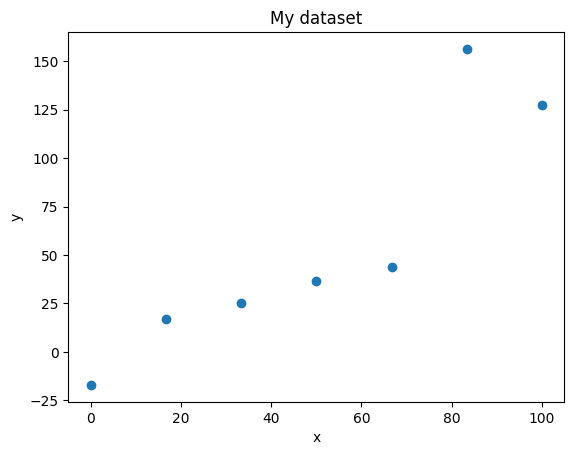

In [89]:
# plot the generated points with noise 

plt.title('My dataset')
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('ligreg1.png')
plt.show()

<b> (a) Estimate the $\beta_0$ and $\beta_1$ from this dataset using MSE minimination (formula on slide 20):

python hints: 

to build the matrix X for x, you might have to "force" it to be a np.array: to convert a list xx to a np.array, use xx = np.array(xx). 

to invert a matrix, use np.linalg.inv. 

for matricial product, use np.dot(,)

In [90]:
# beta = (xT x)**-1 xT y
X = np.zeros((len(x),2))

# fill matrix 
for i in range(len(x)):
    X[i,0] = 1
    X[i,1] = x[i]


XT = np.transpose(X)
Y = np.array(y)

hatbeta = np.dot(np.dot(np.linalg.inv(np.dot(XT, X))  ,  XT) , Y)
# hatbeta_ = np.dot((np.linalg.inv(np.dot(XT, X))), np.dot(XT,Y))
print('the estimation of the slope is ',round(hatbeta[1],2), 'the estimation of the intercept is ', round(hatbeta[0],2))
print('And correct beta1 and beta0 are: ' , beta[1], beta[0])

# this step should be correct! 

the estimation of the slope is  1.57 the estimation of the intercept is  -22.74
And correct beta1 and beta0 are:  1.5 3.0


<b> (b) Estimate sigma from the dataset:

In [91]:
y_hat = beta[0] + beta[1]*x


In [92]:
# we need to estimate sigma, because we want to know how our estimated parameter is distributed.

mse_times_n = 0
for i in range(len(x)):
    mse_times_n += (y[i]-y_hat[i])**2

sigma_hat = np.sqrt(mse_times_n/(n-2))


print('The estimated value of sigma is ', round(sigma_hat,2),', the true value is ', sigma)

# I do not see an error here

The estimated value of sigma is  39.87 , the true value is  25


In [93]:
# Calculate the error made on estimating the beta1

sum = 0 
x_avg = np.average(x)
for i in range(len(x)):
    sum += (x[i]-x_avg)**2

sigmabeta1 = sigma**2 / sum

sigmabeta1 = np.sqrt(sigmabeta1)
print('The error made on estimating the beta1 is ',round(sigmabeta1,2), '(to be compared with the value of sigma: )', round(sigma, 2))

# we see that the value of sigma is much higher than that of the sigma estimating beta1. 

The error made on estimating the beta1 is  0.28 (to be compared with the value of sigma: ) 25


<b> (c) Compute the p value associate with this linear regression and explain what it represents. 
=> you need first to compute $z$, and then compute what is the probability of having observed a $z$ with that value of higher (in absolute valeu). 

Then compute $z_1$ as on slide 28 to get the boundary value of $z$ for acceptance or rejection of the null hypothesis. </b>


hint: you need to estimate the value of sigma from the dataset for this, and rely on formula for $z$ on slide 28

hint 2: use the following functions

t.pdf(...,df) = Probability Density Function (PDF): Returns the probability for an observation having a specific value from the distribution (df = number of degrees of freedom of the t distribution).

t.cdf(...,df) = Cumulative Density Function (CDF): Returns the probability for an observation equal to or lesser than a specific value from the distribution.

t.ppf(..., df) = Percent Point Function (PPF): Returns the observation value for the provided probability that is less than or equal to the provided probability from the distribution.

In [94]:
myz = hatbeta[1] / sigmabeta1

# this is a t-distribution with n-p degrees of freedom
print(myz)


5.530827626659825


In [95]:
# we need to calculate the probability of picking a value of abs(z) or higher out of this t-distribution with n-2 degrees of freedom! 
# this is the p-value.
# probability of picking a z value of abs(z) or less
p_less = t.cdf(myz, n-2)
# p of picking z
p_z = t.pdf(myz, n-2)
# prob of picking z or larger:
p = 1-p_less+p_z
print(p, p_less, p_z)


# compare to blackbox value

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('my p: ', p, 'correct p: ', p_value)


# -> reject H0

# 
#
#   Dein P-Value ist komplett falsch, guck nachher nach
#
#


0.002377208997678849 0.9986753778059688 0.001052586803647671
my p:  0.002377208997678849 correct p:  0.005568312956812103


If it is less than 5 percent, I reject my null hypothesis and I claim that there is a linear relationship between $x$ and $y$. 
The quality of the fit is given by (see slide 29):

In [96]:

TSS = 0 
y_avg = np.average(y)
for i in range(len(x)):
    TSS += (y[i]-y_avg)**2

RSS = 0
for i in range(len(x)):
    RSS += (y[i]- hatbeta[0]-hatbeta[1]*x[i])**2

#proportion of the variance explained
r_sq = 1-RSS/TSS

In [97]:
p_max = 0.975
# retrieve value <= probability
max_z = t.ppf(p_max,len(x)-2)
p_min = 0.025
# retrieve value <= probability
min_z = t.ppf(p_min,len(x)-2)
print(min_z,max_z)

-2.57058183661474 2.5705818366147395


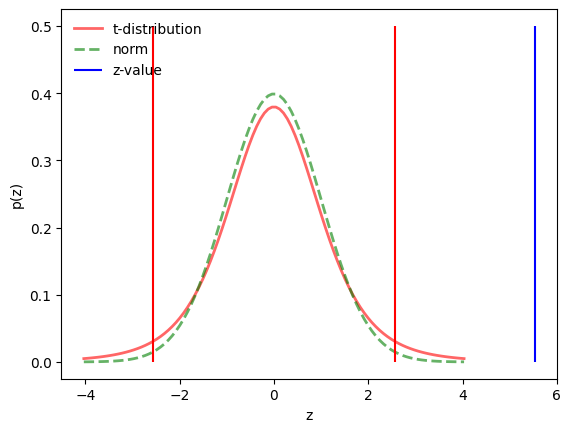

In [98]:

fig, ax = plt.subplots(1, 1)
df = n-2# number of degree of freedom (the -2 is because we estimated two parameters)

x_fig = np.linspace(t.ppf(0.005, df),t.ppf(0.995, df), 100)

ax.plot(x_fig, t.pdf(x_fig, df),'r-', lw=2, alpha=0.6, label='t-distribution')
ax.plot(x_fig, stats.norm.pdf(x_fig),'g--', lw=2, alpha=0.6, label='norm')


ax.vlines(myz,ymin=0,ymax=.5 , label = 'z-value', color = 'blue')
ax.vlines(max_z,colors='r',ymin=0,ymax=.5)
ax.vlines(min_z,colors='r',ymin=0,ymax=.5)

ax.legend(loc='upper left', frameon=False)
ax.set_xlabel('z')
ax.set_ylabel('p(z)')
plt.savefig('linreg2.png')
plt.show()

If the blue line is far from the peak of the distribution (futher than the red lines), it is very unlikely to observe that "z-value" under the null hypothesis => we reject it and accept the fact that there is a linear relation between x and y. 

In [99]:
# we see that the blue line is further from the peak of the distribution than the red lines. 
# so we reject H0.

# FYI - with a black box: 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(p_value)

0.005568312956812103


(d) it is just a check: the $z_{min}$ and $z_{max}$ values (cf slide 28) by integrating the probability distribution => it should give 0.95: 

In [100]:
import scipy.integrate as integrate

from scipy.integrate import quad

def integrand(x, df):

    return t.pdf(x, df)

I = quad(integrand, min_z, max_z, args=(df))

I

(0.9500000000593665, 1.8245854046389232e-13)

(e) Repeat (a) 100 times for different dataset (to be build similarly as above) and represent the obtained $\hat \beta_1$ with an histogram 

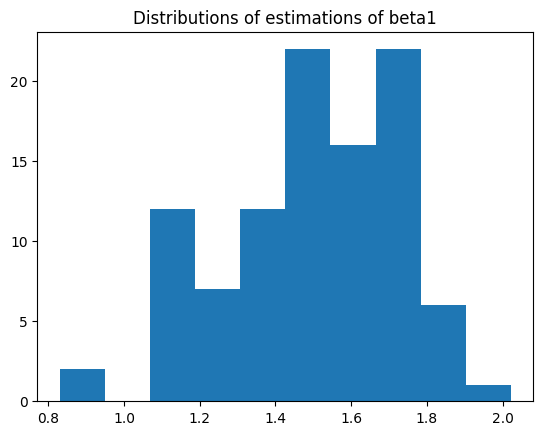

In [101]:
number_of_iterations = 100
beta1_evaluations = np.zeros(number_of_iterations)
beta1_evaluations_over_sigma = np.zeros(number_of_iterations)
sigma_evaluations = np.zeros(number_of_iterations)

for kk in range(number_of_iterations):
    y = np.array([ f(x[kk],beta) + np.random.normal(0,sigma) for kk in range(len(x))])
    # X already defined
    Y = np.array(y)
    betas=np.dot(np.dot(np.linalg.inv(np.dot(XT, X))  ,  XT) , Y)
    beta1_evaluations[kk] = betas[1]
    y_hat = beta[0] + beta[1]*x
    mse = 0
    for i in range(len(x)):
        mse += (y[i]-y_hat[i])**2

    sigma_hat = np.sqrt(mse/(n-2))

    sigma_evaluations[kk] = sigma_hat

    
    sum = 0 
    x_avg = np.average(x)
    for i in range(len(x)):
        sum += (x[i]-x_avg)**2

    sigmabeta1 = np.sqrt(sigma**2 / sum)

    beta1_evaluations_over_sigma[kk] = betas[1]/sigmabeta1

    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

plt.hist(beta1_evaluations)
plt.title('Distributions of estimations of beta1')
plt.show()

In [102]:
if False:
    #to get info about a function, place a ? in front and run in a cell
    ?stats.chi2.fit

Check that the number of dof of the chi2 distribution is given by n-2 (here 2 because we estimated two parameters):

In [103]:
print(np.shape(beta1_evaluations))

df_estimate,loc_estimate, scale_estimate  = stats.chi2.fit(sigma_evaluations)
df_estimate,loc_estimate, scale_estimate

(100,)


(240.02689517616489, -43.687603055614474, 0.29739590091882895)

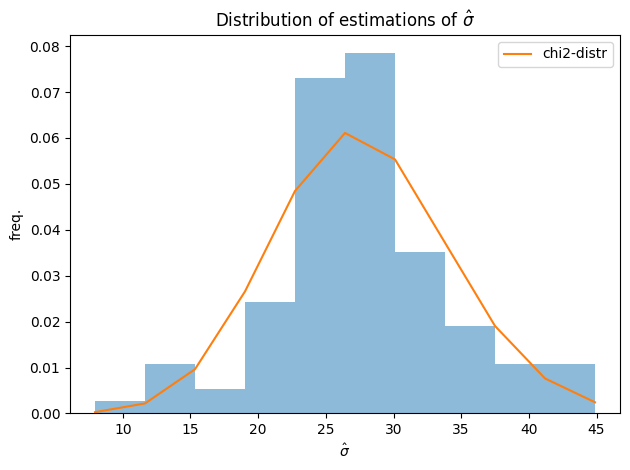

In [104]:
#this should be a chi-2 distribution with n-p dof (so here n=5 and p=2 => 3dof)
plt.figure(tight_layout = True)

fkfq , bins_S, abc = plt.hist(sigma_evaluations, density=1, alpha=0.5)

plt.title('Distribution of estimations of $\hat{\sigma}$')
best_fit_line_chi2 = stats.chi2.pdf(bins_S,df_estimate, loc_estimate, scale_estimate)
plt.plot(bins_S,best_fit_line_chi2,label='chi2-distr')
plt.xlabel('$\hat{\sigma}$')
plt.ylabel('freq.')
plt.legend()
plt.savefig('linreg3.png')
plt.show()

(e) What is the probability distriubtion of the estimated values $\hat \beta_1 / \sigma_{\beta_1}$. Comment your answer. Hint: use stats.norm.fit

In [105]:
mu_normal_fit, sigma_normal_fit = stats.norm.fit(beta1_evaluations_over_sigma)
print(mu_normal_fit, sigma_normal_fit)



5.275834637404596 0.838941848720779


In [106]:
z_evaluations = beta1_evaluations_over_sigma

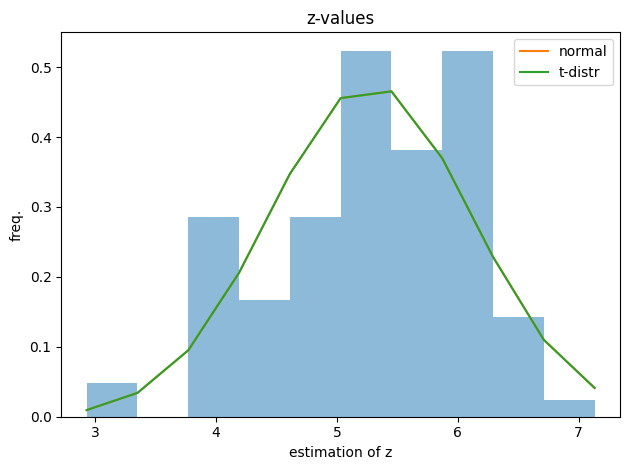

In [107]:
# This plot seemed to work, but I don't understand why


plt.figure(tight_layout = True)

_, bins, _ = plt.hist(z_evaluations, density=1, alpha=0.5)

best_fit_line = stats.norm.pdf(bins, mu_normal_fit, sigma_normal_fit)

df_est, loc_est, scale_est = t.fit(z_evaluations) #fiting to a t-student distribution 
best_fit_line_t = stats.t.pdf(bins,df_est, loc_est, scale_est)

plt.plot(bins, best_fit_line,label='normal')
plt.plot(bins,best_fit_line_t,label='t-distr')

plt.title('z-values')
plt.xlabel('estimation of z')
plt.ylabel('freq.')
plt.legend()
plt.show()

# Exercise: Linear discriminant analysis: pink vs green

We start with a labelled data set whose inputs are : 

In [108]:
X = np.array([1.75860969,  1.21822739, -1.26356318,  2.91537812,  3.10517506,
        3.08995169,  1.73663264,  1.417986  ,  2.97874194,  1.02612401,
        1.44476555,  0.57531973,  0.26809148,  4.09974131,  2.50400378,
        2.99089042,  0.57560659,  1.82877472,  1.4679634 ,  2.43664457,
        1.97868673, -0.80911347,  1.55322051,  1.24100934,  2.39248028,
        3.83483408,  3.1876462 ,  3.55671585,  1.38558747,  3.30074664,
        2.75590294,  2.32096285,  2.85548297,  2.32616711, -1.57455353,
        2.4311101 ,  2.55119646,  2.90450118,  2.00737857,  0.01656822,-1.19331961,  0.68029264, -1.40977742, -1.57572063, -2.65345905,
       -2.16083126,  0.8167179 ,  0.05211783, -3.24852015, -2.09097824,
       -1.77366778, -1.38219704, -3.38111373, -5.17816507, -0.97002885,
       -2.03895265, -0.99034122,  0.39721913, -0.08746797, -2.97716289,
       -4.69607405, -3.19356515, -0.90374167, -2.6196549 ,  0.2500216 ,
       -3.35646837, -1.59124805,  0.04690309, -4.48707835, -2.65187787,
       -1.30699669, -3.7194796 , -2.50237985, -1.19258543, -1.77802654,
       -2.4663718 , -0.64556797, -1.3099631 , -3.26836737,  1.89202167])

In [109]:
X.shape

(80,)

and outputs (here all pink outputs are listed first) :

In [110]:
Y = np.array(['pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','pink','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green','green'])

In [111]:
Y.shape

(80,)

Define an array containing only the 'pink' inputs and one containing only the 'green'inputs:

In [112]:
pink_indices = np.where(Y=='pink')[0]
# contains only pink inputs
pink = X[pink_indices]
green_indices = np.where(Y=='green')[0]
# contains only green inputs
green = X[green_indices]

## Coding a LDA 

Our goal will be to perform a linear discriminant analysis. In the case of two categories (as here with the pink and green categories), this amounts to find the boundary of decision $x^\star$. If the input $x$ is larger than $x^\star$ it belongs to the category for which the mean value of $x$ is larger, and if $x$ is smaller than $x^\star$ it belongs to the other category. 

REM: we can also decide to focuss on only one category, let say the pink category, and decide to assign a sample to this category if if the probability of belonging to this category is higher than 60% for instance (instead of the more "natural" choice of 50 %) => this amounts to change the threshold. 

Here we want to evaluate 

$p_{\text{green}} (x)$ and 

$p_{\text{pink}} (x)$.


We can use the formula: 

$p_k(x) = \frac{ \frac{\pi_k}{\sqrt{2 \pi }\sigma} \exp{(- \frac{1}{2 \sigma^2}(x - \mu_k)^2 )} }{N} $   (with $k =$ pink, green)

if we have estimations for $\pi_k$, $\mu_k$ and $\sigma$. $N$ is a normalisation factor. 



<b> Estimate of the means for both categories: 

In [113]:
mu_p_hat= np.mean(pink)
mu_g_hat= np.mean(green)
print('Mean value of pink samples is ',round(mu_p_hat,2),'and of green samples ', round(mu_g_hat,2))


Mean value of pink samples is  1.91 and of green samples  -1.77


Clearly, samples with a value close to 2 will be more likely to be pink and samples with a value close to -1.5 will be more likely to be green. 

<b> Estimate sigma for the whole data set (see slides):

$\hat \sigma^2  = \frac{1}{n-K} \sum_k \sum_i (x_i - \hat \mu_k)^2$ 

where $K$ is the number of categories (here 2), the first sum is over catergories and the second over the samples within the given category: 

$\hat \sigma^2  = \frac{1}{n-2} ( \sum_{i \text{ for pink samples}} (x_i - \hat \mu_p)^2 \, + \, \sum_{i \text{ for green samples}} (x_i - \hat \mu_g)^2)$ 


In [114]:

pink_sum = 0
for i in range(len(pink)):
    pink_sum += (pink[i]-mu_p_hat)**2

green_sum = 0 
for i in range(len(green)):
    green_sum += (green[i]-mu_g_hat)**2


sigma_hat_2 = 1/(len(X)-2) * (pink_sum + green_sum)
sigma_hat_whole = np.sqrt(sigma_hat_2)

<b> Estimate $\pi_{\text{green}}$ and $\pi_{\text{pink}}$ (this is easy, it is simply the fractions of green and pink samples): 

In [115]:
pi_green = len(green)/len(X)
pi_pink = len(pink)/len(X)

In [116]:
print(pi_pink,pi_green)

0.5 0.5


<b> Find the boundary value $x^\star$ for decision. You need to solve (by hand) the equation $\delta_{\text{pink}}(x^\star) = \delta_{\text{green}}(x^\star)$ (see slide 19):  


$\delta_k (x) =  x \, \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \, \sigma^2} + \log{(\pi_k)} $


In the present case, we want to have $\pi_{\text{green}} = \pi_{\text{pink}}$ and the equation $\delta_{\text{pink}}(x^\star) = \delta_{\text{green}}(x^\star)$ reads

$ x^\star \, \frac{\mu_{\text{pink}}}{\sigma^2} - \frac{\mu_{\text{pink}}^2}{2 \, \sigma^2} + \log{(\pi_{\text{pink}})} = x^\star \, \frac{\mu_{\text{green}}}{\sigma^2} - \frac{\mu_{\text{green}}^2}{2 \, \sigma^2} + \log{(\pi_{\text{green}})} $

and gets actually very simple, 
 
 $ x^\star \, \mu_{\text{pink}} - \frac{\mu_{\text{pink}}^2}{2 }  = x^\star \, \mu_{\text{green}} - \frac{\mu_{\text{green}}^2}{2}  $.
 
 We deduce that
 
 $x^\star = \frac{\mu_{\text{pink}}^2 - \mu_{\text{green}}^2}{ 2 \, (\mu_{\text{pink}}-\mu_{\text{green}})}$


In [117]:
#writing delta_pink = delta_green gives us the boundary value for an new observation 
#to be classified as green or pink 

x_boundary = ( mu_p_hat**2 - mu_g_hat**2 ) / ( 2* (mu_p_hat - mu_g_hat) )
print(x_boundary)

0.07157173687500006


<b> Plot the histogram (just need to have defined x_boundary and the plotting will work):

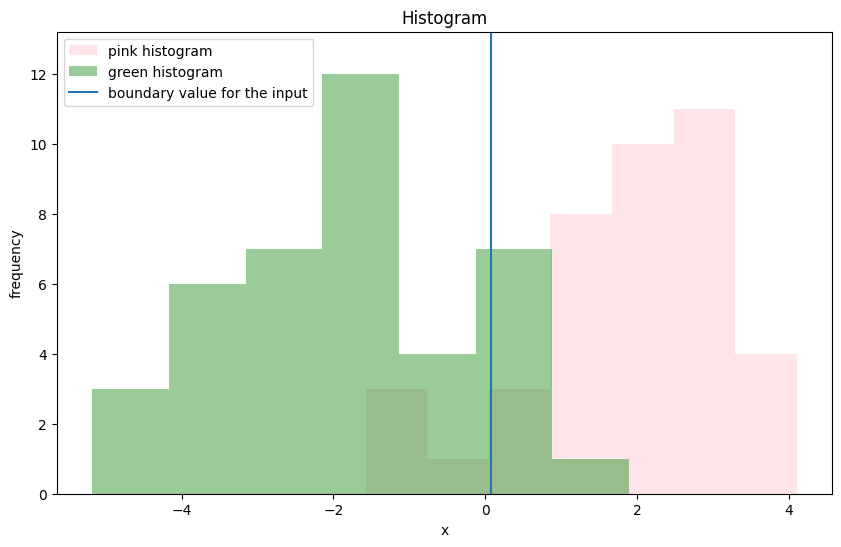

In [118]:
rng = np.random.RandomState(10)  # deterministic random data
bins=np.linspace(-20,20,100)
bins=np.append(bins,np.max([np.max(pink),np.max(green)]))
a = np.hstack((pink,green))
plt.figure(figsize=(10,6))
plt.ylim(top=np.max(bins))
y1, x1,_ = plt.hist(pink, bins='auto',alpha=.4,color='pink',label='pink histogram')  # alpha level => transparent color (in case histog. overlap)
y2, x2,_ = plt.hist(green,bins='auto',alpha=.4,color='green',label='green histogram')
plt.ylim([0,1.1*np.max(np.array([y1,y2]))])
plt.axvline(x_boundary,label='boundary value for the input')
plt.title("Histogram")
plt.xlabel('x')
plt.ylabel('frequency')
plt.legend(loc='upper left')
plt.show()

If you have a new input $x$ for which we do not know the catergory, the LDA will assign this new input to the pink categroy if $x$ is bigger than $x^\star$ and to the green one if $x$ is smaller than $x^\star$ (for a threshold of 50%). 

<b> For information: the dataset has been generated with the following code</b>

In [119]:
if False:  #I put this "if False" not to generate a new dataset
    mu_p = 2
    mu_g = -2
    sigma = 1.5
    number_points = 40
    pink = np.random.normal(mu_p,sigma,number_points)
    green = np.random.normal(mu_g,sigma,number_points)
    n = 2*number_points

The actual "input" data X is given by the pink and green arrays. Here we have drawn inputs for the two categries (pink and green) from gaussian distributions with the same variance but different means. This actually corresponds to the hypothesis we make in the LDA, i.e. we assume that inside each category, samples are gaussianly distributed. We could define it as: 

In [120]:
if False:
    X=np.concatenate((green,pink),axis=0)

The "output" vector y is then y = ('green', 'green', ... , 'pink','pink') with 40 x 'green' and 40 x 'pink'. We could also assign an integer to each category. Let's say that 'green' = 0 and 'pink' = 1 for instance. Then y = (0,0,...,1,1,...). 


## Assessing the training error 

Using the threshold value of x we computed, we can see to which category all samples would be assigned. 

In [121]:
# all 'green' elements in our labelled data set have the following "x" values: 
green

array([-1.19331961,  0.68029264, -1.40977742, -1.57572063, -2.65345905,
       -2.16083126,  0.8167179 ,  0.05211783, -3.24852015, -2.09097824,
       -1.77366778, -1.38219704, -3.38111373, -5.17816507, -0.97002885,
       -2.03895265, -0.99034122,  0.39721913, -0.08746797, -2.97716289,
       -4.69607405, -3.19356515, -0.90374167, -2.6196549 ,  0.2500216 ,
       -3.35646837, -1.59124805,  0.04690309, -4.48707835, -2.65187787,
       -1.30699669, -3.7194796 , -2.50237985, -1.19258543, -1.77802654,
       -2.4663718 , -0.64556797, -1.3099631 , -3.26836737,  1.89202167])

Let us look which of those would been correctly assigned with our obtained threshold: (use green < x_boundary and np.sum), this is the true positive rate:

In [122]:
# unelegant way 
count = 0 
for i in range(len(green)):
    if green[i] < x_boundary:
        count += 1

print(count)

# elegant way
print(np.sum(green<x_boundary))

35
35



Similarly, we will have the following number of correclty classified pink samples:

In [123]:
print(np.sum(pink>x_boundary))

36


Let us focus on the pink category. We can compute the 

- true positive rate : number of correclty classified pink samples. 
- false positive rate : number of samples classified as pink while they are green. 



In [124]:
true_positive_rate = np.sum(pink>x_boundary)
print('true positive rate is ',true_positive_rate)

false_positive_rate = np.sum(green>x_boundary)
print('false positive rate is ',false_positive_rate)

true positive rate is  36
false positive rate is  5



<b> Do a ROC figure.</b>

Let us focus on the pink category. The typical choice is to assign an input $x$ to the pink category is if p_pink(x)>.5. 

However we could choose to be more or less 'cautious' and decide to assign $x$ to the pink category if p_pink(x) > .1,.2,.3,.4,.5,.6,..

For this, we need to evaluate 

$$p_k(x) = \frac{ \frac{\pi_k}{\sqrt{2 \pi} \sigma} \exp{(- \frac{1}{2 \sigma^2}(x - \mu_k)^2 )} }{N} $$

We can first compute the "not normalize $p_k(x)$": 


In [125]:
sigma_hat = np.sqrt(sigma_hat_2)

In [126]:
# in the formula, we will use our estimations for sigma, since we do not know the real sigma

p_pink_notnorm = pi_pink / (np.sqrt(2*np.pi)*sigma_hat) * np.exp(-1/(2*sigma_hat**2)* ( X - mu_p_hat )**2 )
p_green_notnorm = pi_green / (np.sqrt(2*np.pi)*sigma_hat) * np.exp(-1/(2*sigma_hat**2)* ( X - mu_g_hat )**2 )


print(p_pink_notnorm[1], p_green_notnorm[1])

0.12255916715477677 0.016655538583603698


Compute the normalisation factor $N$ for each input:

In [127]:
# is that correct? 

N_hat = np.zeros(len(X))
for i in range(len(X)):
    N_hat[i] = p_pink_notnorm[i] + p_green_notnorm[i]


Compute the p_pink and p_green

In [128]:
# p_pink = [p_pink_notnorm[kk]/N_pink[kk] for kk in range(len(X))]
# p_green = [p_green_notnorm[kk]/N_green[kk] for kk in range(len(X))]

p_pink = [p_pink_notnorm[kk]/N_hat[kk] for kk in range(len(X))]
p_green = [p_green_notnorm[kk]/N_hat[kk] for kk in range(len(X))]


In [129]:
#check normalisation
[p_pink[k]+p_green[k] for k in range(len(X))]
print(np.sum(p_pink))

41.18622217712519


Define an array containing the probability of being pink for true pink samples, and one with the probability of pink for not pink samples : 

In [130]:
number_of_pink = len(pink)
pink1 = []
pink2 = []
for i in range(len(X)):
    if Y[i] == 'pink':
        pink1.append(p_pink[i])
    elif Y[i] == 'green':
        pink2.append(p_pink[i])
    else: 
        print('error')
p_pink_for_true_pink = np.array(pink1)
p_pink_for_not_pink = np.array(pink2)

# print(len(pink1), len(pink2), np.shape(p_pink_for_true_pink), np.shape(p_pink_for_not_pink))
# print(pink1, pink2)


In [131]:
list_threshold = np.array([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

# tpr = true positive rate - pink -> pink
# fpr = false postivive rate - green -> pink

#we define arrays filled with zeros where we will store our results
tpr = np.zeros(len(list_threshold))
fpr = np.zeros(len(list_threshold))

for k in range(len(list_threshold)):
    #compute threshold value
    #compute TPR and store value
    threshold = list_threshold[k]
    tpr[k]= np.sum(p_pink_for_true_pink>=threshold)/number_of_pink
    #compute FPR
    fpr[k]= np.sum(p_pink_for_not_pink>=threshold)/number_of_pink
#

print(np.array([list_threshold,tpr,fpr]))



[[0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.   ]
 [1.    0.95  0.925 0.925 0.925 0.9   0.875 0.875 0.825 0.75  0.   ]
 [1.    0.3   0.225 0.2   0.2   0.125 0.1   0.075 0.025 0.025 0.   ]]


Text(0.5, 0, 'false positive rate')

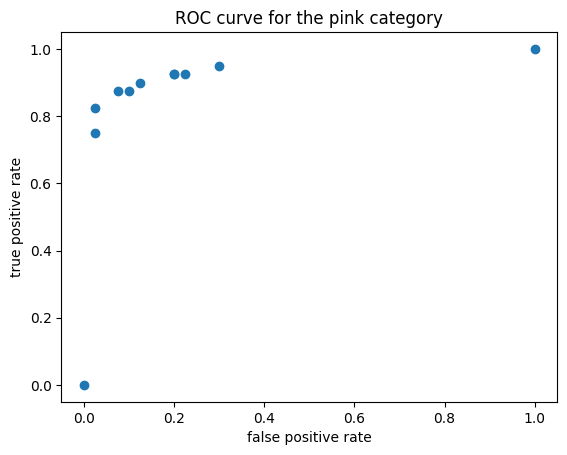

In [132]:
plt.title('ROC curve for the pink category')
plt.scatter(fpr,tpr)
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
# plt.xlim((-0.05,1.05))
# plt.ylim((-0.05,1.05))

Let make the graph a bit nicer by labelling each dot:

In [133]:
colours  = ListedColormap(['r','b','yellow','cyan','pink','purple','black','grey','green','magenta','orange'])
classes = [str(list_threshold[k]) for k in range(len(list_threshold))]
values = list_threshold

print(classes)

['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']


[]

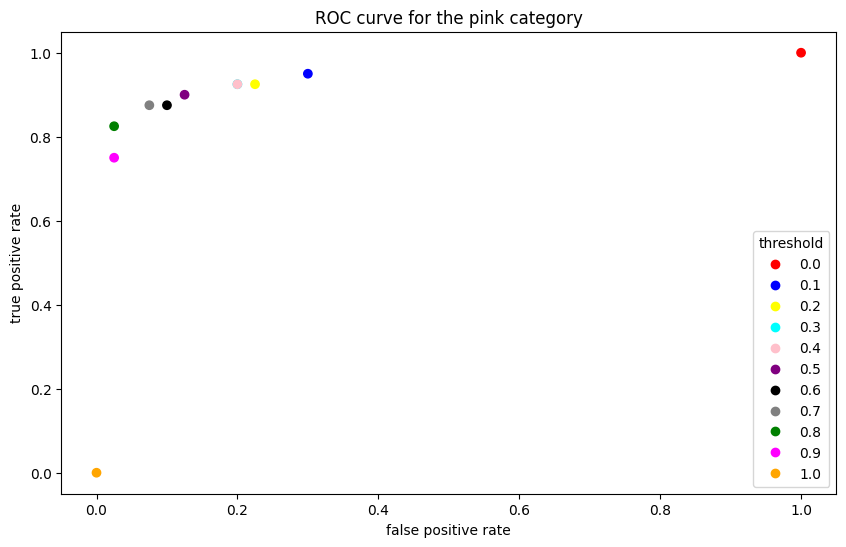

In [134]:

# print(matplotlib.__version__)

plt.figure(figsize=(10,6))
plt.title('ROC curve for the pink category')
scatter = plt.scatter(fpr,tpr,c=values,cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes,title='threshold')
# plt.legend(labels=classes,title='threshold')
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))
plt.plot()

Comment this ROC curve: 

We see that the ROC Curve looks as anticipated. 
It has the usual shape. It ist not really linear which implicates ...

# Exercise: The simplest neural network ever

In [135]:
# sigmoid function - this is our squeezing funct (when deriv=False) and its derivative (when deriv = True)

# squeezing function
def nonlin(x, deriv=False):
    if (deriv == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))


# input dataset
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
print('shape inputs X',X.shape)
# output dataset
y = np.array([[0, 0, 1, 1]]).T
print('shape outputs Y',y.shape)
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
weights = 2 * np.random.random((3, 1)) - 1


print('weights shape',weights.shape)


shape inputs X (4, 3)
shape outputs Y (4, 1)
weights shape (3, 1)


Make a loop over 10 000 iteration to update the weights for a ONE LAYER neural network with 1 ouput in the loop you should start by evaluating the output with the current weights then you compute the error made
to update your weights, you can use the 'gradient method' finally you need to update your weights. 



<img src="./figures/nn_simple_1.jpg" width="800" height="400">


In [136]:
weights = 2 * np.random.random((3, 1)) - 1
a0 = X
print('a0 shape',a0.shape)
a1 = y
eta=.5 #learning rate
print(a1.shape)
for iter in range(1000):
    # forward propagation => this is the formula for a_O^(1) in the first image above. 
    a1_hat = ...... # rem: this is computing the outputs of all inputs at once! (because a0 is )
    # how much did we miss (a1_hat is our estimation of the result)?- again this is an array containing the errors for all samples
    a1_error = ... 
    # compute the gradient of C (multiply how much we missed by the slope of the sigmoid at x* (see slide))
    gradcost = .....
    #print('a1_delta shape',a1_delta.shape)
    # update weights (the dot product is to sum over the whole training set)
    weights += ...
    
print('Output After Training:')
print(a1_hat)
print('True output')
print(a1)



SyntaxError: invalid syntax (2799084605.py, line 9)

# Exercise: Resampling Methods

Apply either a black box LDA or black box NN to the myX, myY dataset and estimate the test error. Justify your choice of resampling method and comment the result obtained. 

You can find examples in the notebook examples_supervised_learning.ipynb

In [ ]:
myX = np.loadtxt('myX.txt')
myY= np.genfromtxt('myY.txt',delimiter='\n',dtype=str)